In [37]:
import importlib
import sys  

import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn


In [4]:
df_train = pd.read_csv("/Users/guillaumeappe/Desktop/data_folder/hackathon_gan/merged_cancer_types/merged_cancer_type_most_variant_train.csv",
                       index_col=0)
df_train = df_train.T
df_train = df_train.astype('float')
df_train = df_train.applymap(lambda x: np.log2(x+1))
df_train

,EEF1A1,REG3A,IGHA1,MALAT1,IGKC,IGHA2,ACTB,NEAT1,FN1,FTL,...,KAT2B,TTC39B,ADGRL4,NT5E,MAPKAPK3,FLT4,SLC30A2,GIMAP4,TTLL12,JDP2
GTEX-ZYFG-1826-SM-5GZWX,19.032436,1.000000,5.209453,17.080755,6.539159,1.584963,18.007761,17.361027,17.295599,16.696003,...,11.642954,10.731319,10.327553,10.240791,11.118941,10.769011,5.247928,10.389094,10.484823,10.970106
GTEX-1ICG6-2226-SM-B2LY7,18.411643,0.000000,2.584963,17.718988,4.523562,1.000000,18.234345,17.705275,17.151264,16.998601,...,11.689124,10.681238,10.332037,10.690871,11.271463,10.573647,5.554589,11.076148,10.738092,11.065416
C3L-00993-01,18.148417,0.000000,14.261287,11.340406,16.890217,12.244661,15.194565,16.217371,14.377414,14.107135,...,8.164907,7.707359,6.832890,8.787903,9.786270,6.066089,5.672425,5.614710,12.961450,7.918863
C3N-02144-02,15.925948,0.000000,13.178665,17.007345,15.125171,10.842350,18.049077,17.989993,17.966719,16.398059,...,9.921841,8.535275,9.219169,9.926296,11.298063,8.335390,9.308339,7.930737,10.025140,9.353147
GTEX-1RAZQ-1226-SM-EWRNL,18.435121,0.000000,11.187971,17.829147,12.134747,8.519636,17.154887,17.351845,15.746199,16.232889,...,11.397140,11.949462,10.256209,11.014718,11.624339,10.779719,3.321928,11.132500,11.663558,10.798472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe83e13f-9754-403b-8f74-d6caf8,17.168388,0.000000,14.458343,14.688360,14.892827,13.637078,16.275706,16.515946,15.506432,15.680744,...,9.392317,9.914385,9.571753,10.107217,10.389094,8.968667,3.584963,10.192293,9.789534,9.665336
GTEX-1AX9I-0826-SM-73KUT,18.826580,0.000000,16.613948,17.781276,16.917290,12.613559,17.188608,17.989334,17.544368,15.945055,...,11.753217,11.418907,11.226412,11.557942,10.413628,10.974415,7.219169,11.243769,10.491853,11.098690
GTEX-13OVI-1126-SM-5KLZF,18.974311,0.000000,16.380038,17.126876,17.063279,14.074810,17.815871,17.721887,16.908240,16.236052,...,12.052908,11.924070,11.548822,11.535761,11.604553,10.027906,6.459432,12.120238,11.440869,11.907642
C3L-00581-01,17.925722,8.113742,14.560452,16.541112,16.061139,12.950374,17.494285,17.656830,16.039133,16.111849,...,11.262682,11.989749,9.832890,9.786270,9.556506,9.550747,4.169925,10.716819,10.392317,9.259743


In [6]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df_train)
scaled_train_df = pd.DataFrame(scaled_train, index=df_train.index, columns=df_train.columns)
#scaler.inverse_transform(scaled_train_df)

In [21]:
clinical_data = pd.read_csv("/Users/guillaumeappe/Desktop/data_folder/hackathon_gan/merged_cancer_types/merged_cancer_clinical_data.csv",
                       index_col=0)
clinical_data = clinical_data.loc[df_train.index]
clinical_data["metapipeline_sample_type"] = clinical_data["metapipeline_sample_type"].replace({"Normal tissue":0, "Primary tumor":1})
clinical_data

,metapipeline_donor_type,metapipeline_sample_type,metapipeline_cancer_type,metapipeline_dataset
GTEX-ZYFG-1826-SM-5GZWX,Healthy donor,0,healthy,gtex_colon
GTEX-1ICG6-2226-SM-B2LY7,Healthy donor,0,healthy,gtex_colon
C3L-00993-01,Cancer patient,1,lung,cptac_lung
C3N-02144-02,Cancer patient,1,lung,cptac_lung
GTEX-1RAZQ-1226-SM-EWRNL,Healthy donor,0,healthy,gtex_breast
...,...,...,...,...
fe83e13f-9754-403b-8f74-d6caf8,Cancer patient,1,ovarian,cptac_ovarian
GTEX-1AX9I-0826-SM-73KUT,Healthy donor,0,healthy,gtex_lung
GTEX-13OVI-1126-SM-5KLZF,Healthy donor,0,healthy,gtex_kidney
C3L-00581-01,Cancer patient,1,kidney,cptac_kidney


In [11]:
scaled_train_df

,EEF1A1,REG3A,IGHA1,MALAT1,IGKC,IGHA2,ACTB,NEAT1,FN1,FTL,...,KAT2B,TTC39B,ADGRL4,NT5E,MAPKAPK3,FLT4,SLC30A2,GIMAP4,TTLL12,JDP2
GTEX-ZYFG-1826-SM-5GZWX,1.094581,-0.185508,-1.721665,0.429880,-1.686065,-1.928377,1.058735,0.576965,1.182382,0.273621,...,0.722383,0.103164,0.124311,0.098206,0.391707,0.438806,0.301548,0.024240,-0.085198,0.443046
GTEX-1ICG6-2226-SM-B2LY7,0.452787,-0.539724,-2.386314,1.039316,-2.229607,-2.067412,1.279943,0.924318,1.082722,0.555963,...,0.761820,0.057930,0.127692,0.504967,0.544138,0.294447,0.449433,0.514294,0.177180,0.520632
C3L-00993-01,0.180655,-0.539724,0.570697,-5.051466,1.105284,0.605236,-1.687712,-0.577007,-0.832582,-2.141949,...,-2.248488,-2.628141,-2.510322,-1.214847,-0.940171,-3.036286,0.506259,-3.381172,2.480501,-2.040785
C3N-02144-02,-2.117002,-0.539724,0.296525,0.359782,0.629308,0.271933,1.099071,1.211604,1.645782,-0.004379,...,-0.747754,-1.880350,-0.711302,-0.186020,0.570722,-1.359450,2.259659,-1.729225,-0.561414,-0.873222
GTEX-1RAZQ-1226-SM-EWRNL,0.477058,-0.539724,-0.207615,1.144505,-0.177114,-0.280133,0.226098,0.567700,0.112545,-0.158492,...,0.512413,1.203417,0.070525,0.797645,0.896803,0.446719,-0.627255,0.554488,1.135930,0.303329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe83e13f-9754-403b-8f74-d6caf8,-0.832529,-0.539724,0.620601,-1.854571,0.566652,0.936188,-0.632223,-0.275739,-0.053012,-0.673677,...,-1.200061,-0.634708,-0.445488,-0.022512,-0.337706,-0.891508,-0.500408,-0.116131,-0.805493,-0.619088
GTEX-1AX9I-0826-SM-73KUT,0.881761,-0.539724,1.166505,1.098794,1.112585,0.692916,0.259018,1.210939,1.354154,-0.427059,...,0.816566,0.724208,0.801963,1.288586,-0.313186,0.590583,1.252168,0.633853,-0.077915,0.547718
GTEX-13OVI-1126-SM-5KLZF,1.034490,-0.539724,1.107268,0.473920,1.151954,1.040229,0.871398,0.941080,0.914917,-0.155542,...,1.072556,1.180482,1.045029,1.268540,0.877030,-0.108813,0.885789,1.259009,0.905233,1.206237
C3L-00581-01,-0.049573,2.334295,0.646461,-0.085415,0.881708,0.772971,0.557443,0.875436,0.314811,-0.271430,...,0.397563,1.239805,-0.248616,-0.312569,-1.169797,-0.461396,-0.218313,0.257997,-0.181030,-0.949256


# Scatter plots replication

In [20]:
gen_samples

,Unnamed: 0,EEF1A1,REG3A,IGHA1,MALAT1,IGKC,IGHA2,ACTB,NEAT1,FN1,...,TTC39B,ADGRL4,NT5E,MAPKAPK3,FLT4,SLC30A2,GIMAP4,TTLL12,JDP2,metapipeline_sample_type
0,0,0.667105,-0.105590,0.367752,0.438070,0.402697,0.115503,0.449098,0.555147,0.352073,...,0.591980,0.630829,0.091109,0.250249,0.555766,0.456891,0.639756,0.404693,0.599088,1
1,1,0.712271,-0.070840,0.358076,0.466663,0.412240,0.104271,0.508784,0.607703,0.416127,...,0.641321,0.692297,0.071077,0.258127,0.659098,0.470975,0.694696,0.429129,0.660621,0
2,2,0.682630,-0.104977,0.375050,0.449993,0.413272,0.121285,0.444617,0.559565,0.356628,...,0.595105,0.640078,0.090854,0.257182,0.559362,0.470130,0.644672,0.404908,0.610086,1
3,3,0.677562,-0.103633,0.373043,0.448630,0.409702,0.121052,0.457686,0.565511,0.359405,...,0.601212,0.643880,0.092857,0.256719,0.567212,0.463863,0.649474,0.410916,0.610016,1
4,4,0.699609,-0.104035,0.382159,0.464575,0.423764,0.123420,0.455957,0.573306,0.365792,...,0.611255,0.657929,0.091012,0.275338,0.579418,0.484560,0.659554,0.413844,0.628747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.713971,-0.113886,0.397209,0.473565,0.435964,0.123340,0.441057,0.574490,0.363468,...,0.609469,0.659340,0.102915,0.278911,0.579900,0.494587,0.654461,0.421903,0.632544,0
496,496,0.690926,-0.091650,0.362691,0.454518,0.407402,0.113001,0.489215,0.587652,0.393008,...,0.624038,0.667032,0.084925,0.263081,0.617849,0.468212,0.674449,0.419694,0.635351,0
497,497,0.678809,-0.103177,0.374487,0.448987,0.412525,0.122517,0.455131,0.564882,0.361683,...,0.600329,0.642694,0.094936,0.255279,0.566190,0.465949,0.648482,0.410972,0.609522,1
498,498,0.670210,-0.103729,0.363399,0.438209,0.400763,0.116792,0.451940,0.557371,0.355390,...,0.595128,0.635135,0.090067,0.253562,0.560910,0.457168,0.641869,0.403527,0.604330,1


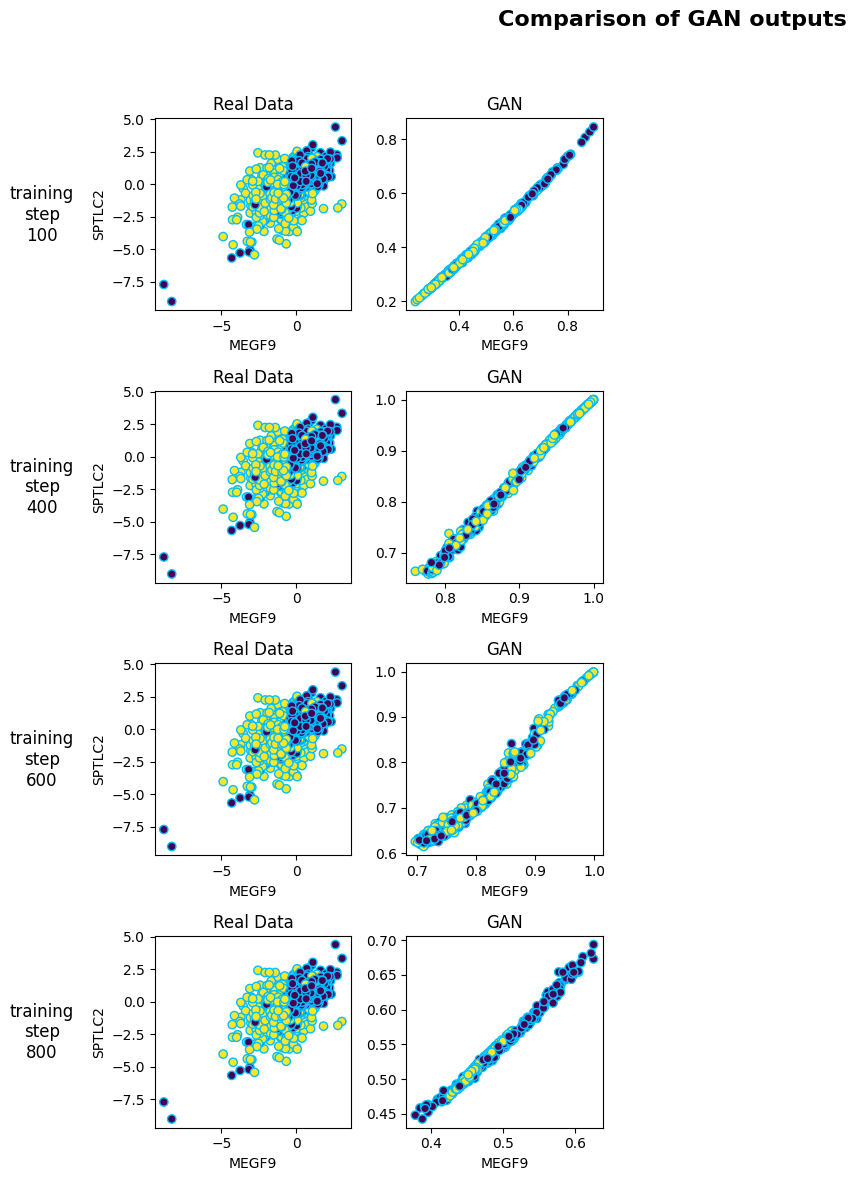

In [34]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
#class_labels = ['Class 1','Class 2']
#col1, col2 = 'MAP4', 'RPS15'
col1, col2 = 'MEGF9', 'SPTLC2'
base_dir = '/Users/guillaumeappe/Desktop/other_projects/hackathon_gan/synthetic_data/'

#Actual fraud data visualization
model_steps = [100,400,600,800]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    # for group, color, marker, label in zip(real_samples.groupby('Class'), colors, markers, class_labels ):
    plt.scatter(
        scaled_train_df[[col1]], scaled_train_df[[col2]], 
        marker='o', edgecolors=['deepskyblue'], facecolors='none', c=clinical_data["metapipeline_sample_type"])
    
    plt.title('Real Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    


    # if model_step_ix == 0: 
        # legend = plt.legend()
        # legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):

        #model_name, with_class, generator_model =  'GAN', False, model(gan_args, n_critic = 10)

        #generator_model.train(data = train_data, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

        #generator_model_2=generator_model.generator
        #generator_model_2.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )
        #ax.set_xlim([-2,2]), ax.set_ylim([-2,2])

        #g_z = generator_model_2.predict(z)
        #gen_samples = pd.DataFrame(g_z, columns=real_samples.columns)
        #gen_samples.to_csv('Generated_sample.csv')
        gen_samples=pd.read_csv(f'{base_dir}/beta_0.5_beta_0.5_{model_step}.csv')
        plt.scatter( gen_samples[[col1]], gen_samples[[col2]], 
                        marker=markers[0], edgecolors=colors[0], facecolors='none', c=gen_samples["metapipeline_sample_type"])
        plt.title(model_name)   
        plt.xlabel(col1)
        #ax.set_xlim(xlims), ax.set_ylim(ylims)
        #plt.ylim([-1, 0])


plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

# TSNE

In [38]:
# TSNEs

from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  
import umap.umap_ as umap

def tsne_2d(data, **kwargs):
    """
    Transform data to 2d tSNE representation
    :param data: expression data. Shape=(dim1, dim2)
    :param kwargs: tSNE kwargs
    :return:
    """
    print('... performing tSNE')
    tsne = TSNE(n_components=2, **kwargs)
    return tsne.fit_transform(data)


def plot_tsne_2d(data, labels, **kwargs):
    """
    Plots tSNE for the provided data, coloring the labels
    :param data: expression data. Shape=(dim1, dim2)
    :param labels: color labels. Shape=(dim1,)
    :param kwargs: tSNE kwargs
    :return: matplotlib axes
    """
    dim1, dim2 = data.shape

    # Prepare label dict and color map
    label_set = set(labels)
    label_dict = {k: v for k, v in enumerate(label_set)}

    # Perform tSNE
    if dim2 == 2:
        # print('plot_tsne_2d: Not performing tSNE. Shape of second dimension is 2')
        data_2d = data
    elif dim2 > 2:
        data_2d = tsne_2d(data, **kwargs)
    else:
        raise ValueError('Shape of second dimension is <2: {}'.format(dim2))

    # Plot scatterplot
    for k, v in label_dict.items():
        plt.scatter(data_2d[labels == v, 0], data_2d[labels == v, 1],
                    label=v)
    plt.legend()
    return plt.gca()

/Users/guillaumeappe/hackathon-gan/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
#class_labels = ['Class 1','Class 2']
col1, col2 = 'SEMA3G', 'RPS15'
base_dir = '/Users/guillaumeappe/Desktop/other_projects/hackathon_gan/synthetic_data/'

#Actual fraud data visualization
model_steps = [100,400,600,800]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        


        #ax.set_xlim([-2,2]), ax.set_ylim([-2,2])

        #g_z = generator_model_2.predict(z)
        #gen_samples = pd.DataFrame(g_z, columns=real_samples.columns)
        #gen_samples.to_csv('Generated_sample.csv')
        gen_samples=pd.read_csv(f'{base_dir}/beta_0.5_beta_0.5_{model_step}.csv', index_col=0)
        df_synth=gen_samples.drop(["metapipeline_sample_type"], axis=1)
        df_train=scaled_train_df
        x_combined = np.concatenate((df_train, df_synth))
        categories = ['real'] * df_train.shape[0] + ['fake'] * df_synth.shape[0]

        emb_2d = umap.UMAP().fit_transform(x_combined)

        plt.figure(figsize=(10, 10))
        plot_tsne_2d(emb_2d, labels=np.array(categories), s=4)
        plt.title('UMAP real/synthetic')
        #ax.set_xlim(xlims), ax.set_ylim(ylims)
        #plt.ylim([-1, 0])


plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
#vpositions = np.array([ i._position.bounds[1] for i in axarr ])
#vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
#for model_step_ix, model_step in enumerate( model_steps ):
#    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')




KeyboardInterrupt: 

<Figure size 1400x1200 with 0 Axes>

# Distributions

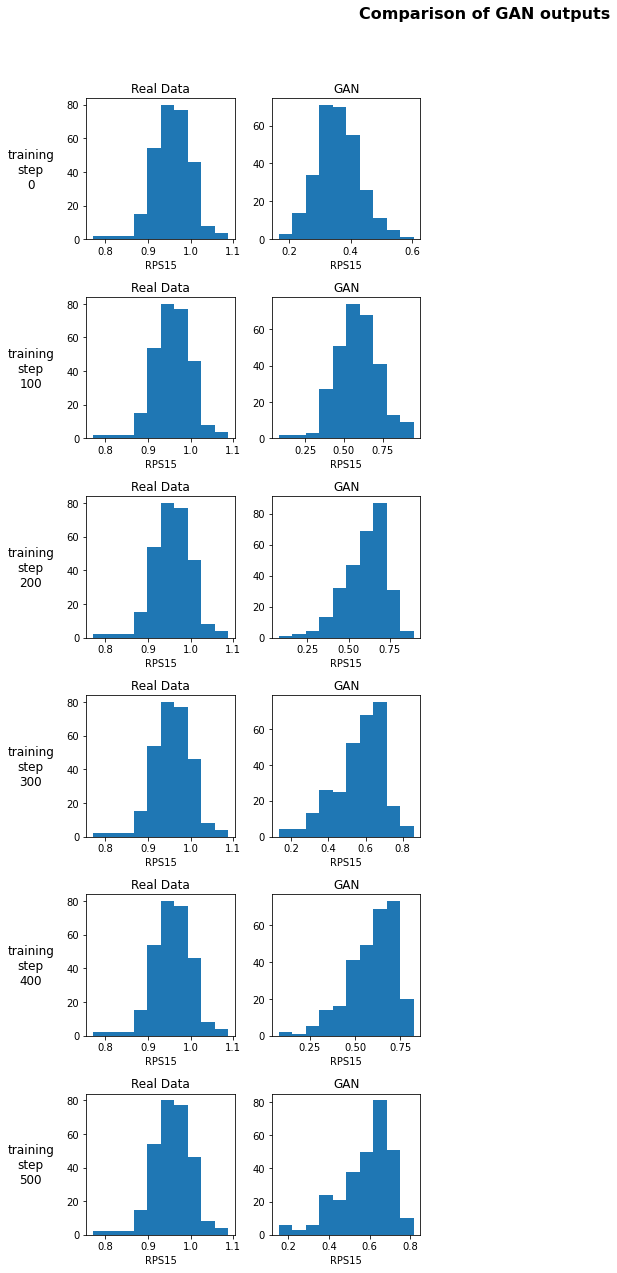

In [103]:
# Plot the distribution for the same genes 

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
#class_labels = ['Class 1','Class 2']
col1=  'RPS15'
base_dir = 'cache/'

#Actual fraud data visualization
model_steps = [ 0,100,200,300,400,500]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    # for group, color, marker, label in zip(real_samples.groupby('Class'), colors, markers, class_labels ):
    plt.hist(
        train_data[[col1]])
    
    plt.title('Real Data')
    #plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    


    # if model_step_ix == 0: 
        # legend = plt.legend()
        # legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):

        model_name, with_class, generator_model =  'GAN', False, model(gan_args, n_critic = 10)

        #generator_model.train(data = train_data, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

        #generator_model_2=generator_model.generator
        #generator_model_2.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )
        #ax.set_xlim([-2,2]), ax.set_ylim([-2,2])

        #g_z = generator_model_2.predict(z)
        #gen_samples = pd.DataFrame(g_z, columns=real_samples.columns)
        #gen_samples.to_csv('Generated_sample.csv')
        gen_samples=pd.read_csv(f'gen_batch_corrected/Generated_sample_{model_step}.csv')
        plt.hist( gen_samples[[col1]]  )
        plt.title(model_name)   
        plt.xlabel(col1)
        #ax.set_xlim(xlims), ax.set_ylim(ylims)
        #plt.ylim([-1, 0])


plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

#plt.savefig('Comparison_of_GAN_outputs.png')

# Correlation heatmap


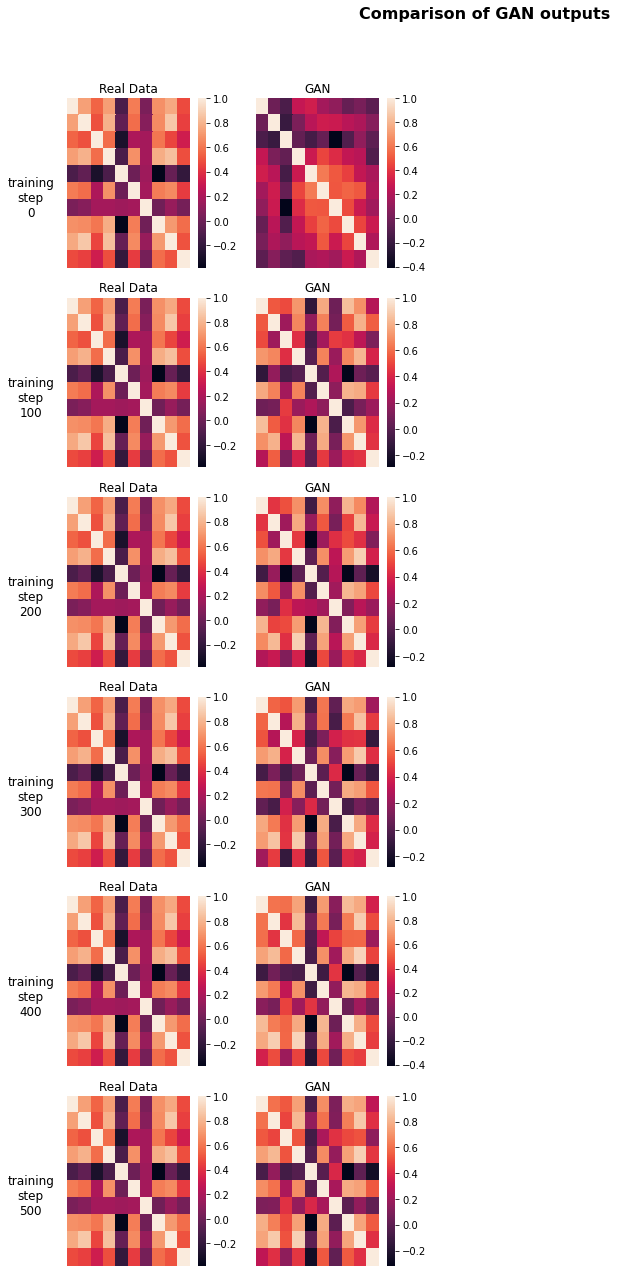

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    
#  Plot the distribution for the same genes 

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
#class_labels = ['Class 1','Class 2']
col1=  'RPS15'
base_dir = 'cache_old/'

# Select 1000 random columns 
sample_df=train_data.sample(10,axis='columns').corr()
sample_columns=sample_df.columns

#Actual fraud data visualization
model_steps = [ 0,100,200,300,400,500]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    # for group, color, marker, label in zip(real_samples.groupby('Class'), colors, markers, class_labels ):
    #plt.hist(
    #    train_data[[col1]])

    sns.heatmap(train_data[sample_columns].corr(),xticklabels=False,yticklabels=False);

    
    plt.title('Real Data')
    #plt.ylabel(col2) # Only add y label to left plot
    #plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    


    # if model_step_ix == 0: 
        # legend = plt.legend()
        # legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):

        model_name, with_class, generator_model =  'GAN', False, model(gan_args, n_critic = 10)

        #generator_model.train(data = train_data, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

        #generator_model_2=generator_model.generator
        #generator_model_2.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )
        #ax.set_xlim([-2,2]), ax.set_ylim([-2,2])

        #g_z = generator_model_2.predict(z)
        #gen_samples = pd.DataFrame(g_z, columns=real_samples.columns)
        #gen_samples.to_csv('Generated_sample.csv')
        gen_samples=pd.read_csv(f'gen_batch_corrected/Generated_sample_{model_step}.csv')
        #plt.hist( gen_samples[[col1]]  )
        sns.heatmap(gen_samples[sample_columns].corr(),xticklabels=False,yticklabels=False);

        plt.title(model_name)   
        #plt.xlabel(col1)
        #ax.set_xlim(xlims), ax.set_ylim(ylims)
        #plt.ylim([-1, 0])


plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)


In [75]:
sample_df=train_data.sample(1000,axis='columns').corr()
sample_columns=sample_df.columns
len(sample_columns)

1000